In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('shein_mens_fashion.csv')
df.head()

,product_id,sku,url,title,color,sale_price/amount,sale_price/amount_with_symbol,retail_price/amount,retail_price/amount_with_symbol,discount_percentage,category_name,category_id,description,reviews_count,average_rating
0,22039173,sm2307273039173611,https://us.shein.com/Manfinity-Homme-Men-Plus-...,Manfinity Homme Men Plus Solid Tee & Shorts,White,18.74,$18.74,26.39,$26.39,29,Men Plus Size T-Shirt Co-ords,6317,Color: White\nStyle: Casual\nPattern Type: Pla...,64,4.98
1,24808563,rm2308169291469282,https://us.shein.com/ROMWE-Street-Life-Men-Let...,ROMWE Street Life Men's Short Sleeve T-Shirt W...,Black,9.24,$9.24,12.49,$12.49,26,Men T-Shirts,1980,Color: Black\nStyle: Casual\nPattern Type: Car...,100,4.95
2,23321220,sm2309079942461816,https://us.shein.com/Manfinity-Men-Contrast-Pa...,Manfinity Men Contrast Panel Drawstring Sweatp...,Navy Blue,6.15,$6.15,14.29,$14.29,57,Men Sweatpants,2988,Color: Navy Blue\nPattern Type: Colorblock\nDe...,1000,4.87
3,27635772,sm2311021427722837,https://us.shein.com/Manfinity-Homme-Men-s-Plu...,Manfinity Homme Men's Plus Size Striped Trim S...,Apricot,13.19,$13.19,14.99,$14.99,12,Men Plus Size Polo Shirts,6307,Color: Apricot\nStyle: Casual\nPattern Type: P...,24,4.92
4,30885163,sm2403027733789007,https://us.shein.com/Mens-Fitness-Taco-Funny-T...,Mens Fitness Taco Funny T Shirt Humorous Gym G...,Heather Red,11.99,$11.99,11.99,$11.99,0,Men T-Shirts,1980,Color: Heather Red\nStyle: Casual\nLength: Reg...,0,0.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   product_id                       1000 non-null   int64  
 1   sku                              1000 non-null   object 
 2   url                              1000 non-null   object 
 3   title                            1000 non-null   object 
 4   color                            1000 non-null   object 
 5   sale_price/amount                1000 non-null   float64
 6   sale_price/amount_with_symbol    1000 non-null   object 
 7   retail_price/amount              1000 non-null   float64
 8   retail_price/amount_with_symbol  1000 non-null   object 
 9   discount_percentage              1000 non-null   int64  
 10  category_name                    1000 non-null   object 
 11  category_id                      1000 non-null   int64  
 12  description          

In [4]:
df.describe()

,product_id,sale_price/amount,retail_price/amount,discount_percentage,category_id,reviews_count,average_rating
count,1.000000e+03,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000
mean,1.931134e+07,12.645300,16.54844,22.741000,3150.686000,533.81700,4.667020
std,7.517931e+06,5.746236,7.58736,12.731693,2302.790795,435.50684,1.056461
min,6.782140e+05,3.170000,6.59000,0.000000,1974.000000,0.00000,0.000000
25%,1.394833e+07,8.840000,11.39000,13.000000,1979.000000,100.00000,4.870000
50%,2.038585e+07,11.490000,13.99000,25.000000,1980.000000,500.00000,4.920000
75%,2.576541e+07,15.490000,20.71500,31.000000,2484.000000,1000.00000,4.960000
max,3.088667e+07,60.490000,69.79000,70.000000,9042.000000,1000.00000,5.000000


In [25]:
continuous_features = ['sale_price/amount', 'retail_price/amount', 'discount_percentage', 'reviews_count', 'average_rating']
discrete_features = ['color', 'category_name']


color
Black                              196
Multicolor                         149
White                              104
Khaki                               67
Apricot                             31
Grey                                31
Navy Blue                           29
Dark Grey                           29
Army Green                          26
Blue                                22
Light Wash                          20
Green                               20
Black and White                     19
Light Grey                          18
Pink                                17
Beige                               16
Burgundy                            15
Red                                 14
Dusty Blue                          13
Baby Blue                           12
Dark Green                          12
Brown                               12
Mint Green                          11
Medium Wash                         10
Coffee Brown                         9
Blue and White     

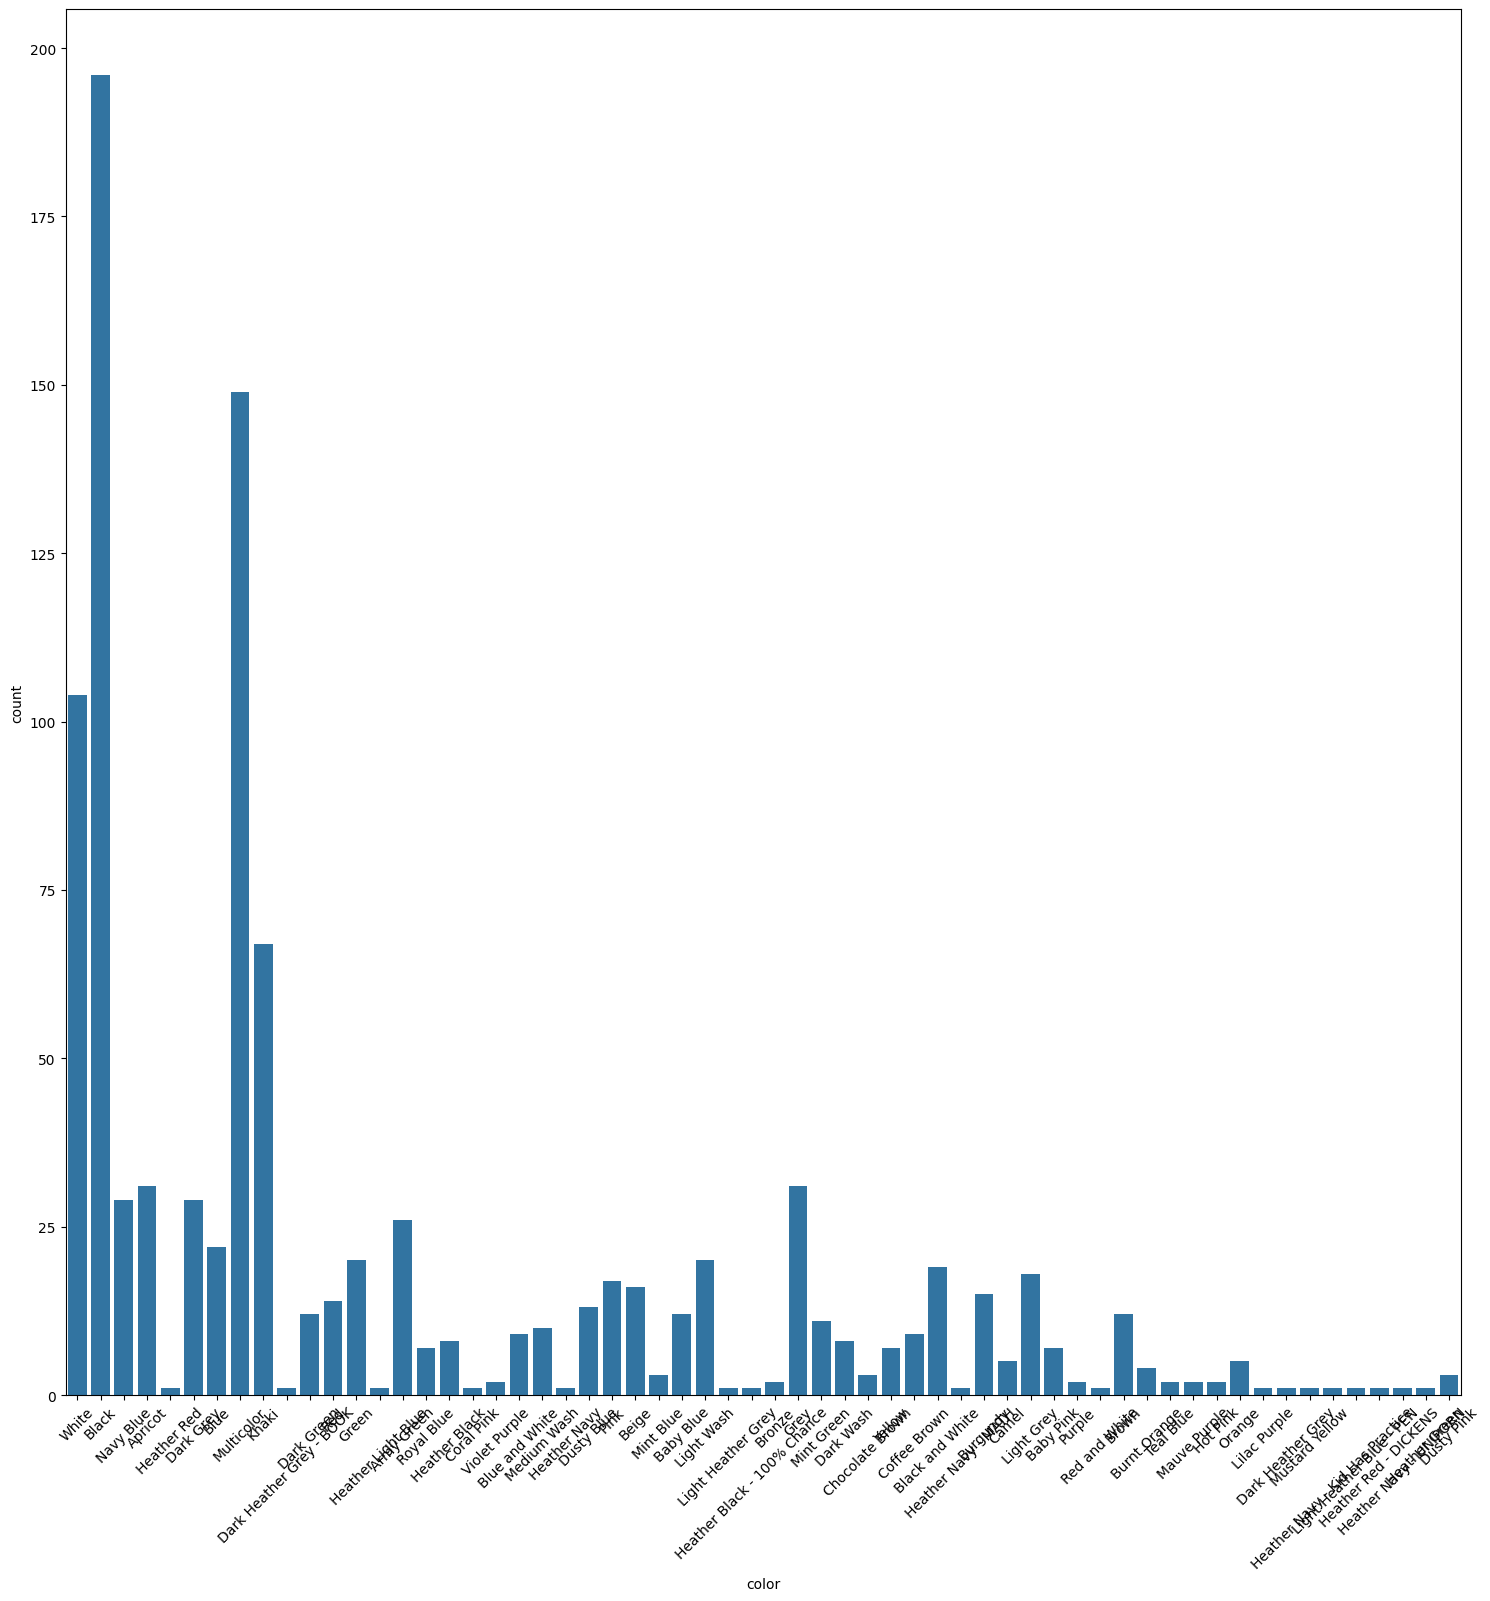

category_name
Men T-Shirts                                 224
Men Shirts                                    81
Men Shorts                                    78
Men Polo Shirts                               69
Men Jeans                                     66
Men Beach Shorts                              63
Men T-Shirt Co-ords                           57
Men Pants                                     55
Men Shirt Co-ords                             35
Men Sweatpants                                33
Men Plus Size T-Shirts                        25
Men Hoodies                                   22
Men Plus Size Shirts                          19
Men Sweatshirts                               16
Men Plus Size T-Shirt Co-ords                 15
Men Plus Size Shirt Co-ords                   15
Men Jackets & Coats                           15
Men Suits                                     10
Men Suit Pants                                10
Men Hoodie & Sweatshirt Co-ords                9
Men Sw

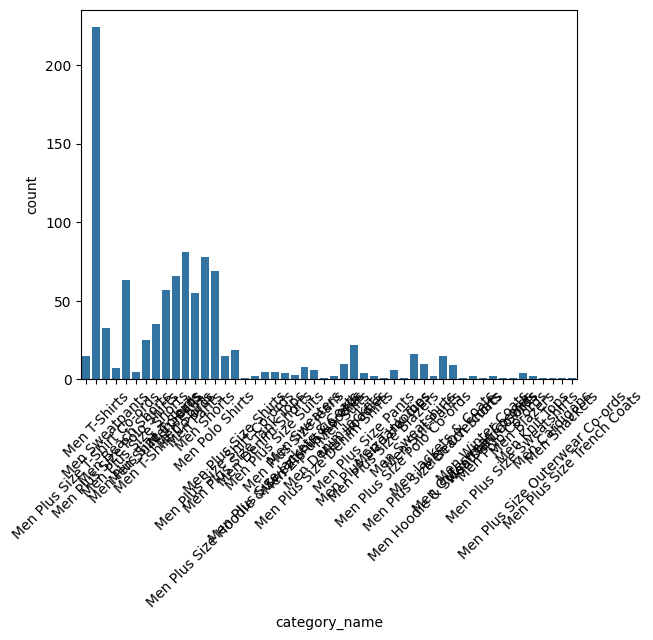

In [10]:
plt.figure(figsize = (18, 18))
for non_numeric_feature in discrete_features:
    print(df[non_numeric_feature].value_counts())
    sns.countplot(data = df, x = non_numeric_feature)
    plt.xticks(rotation = 45, )
    plt.show()

(array([ 47.,   0.,   1.,   0.,   1.,   0.,   2.,   1.,   7., 941.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

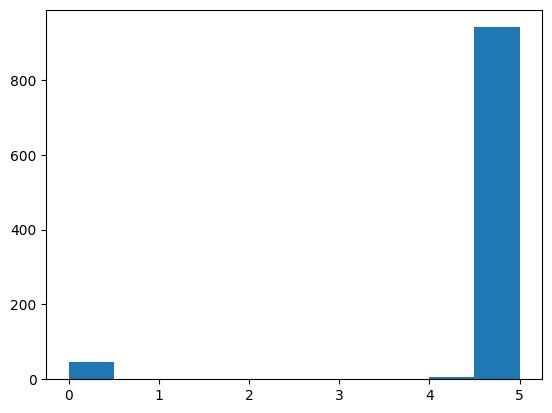

In [13]:
plt.hist(data = df, x = 'average_rating')

In [15]:
continous_features

['sale_price/amount',
 'retail_price/amount',
 'discount_percentage',
 'review_counts',
 'average rating']

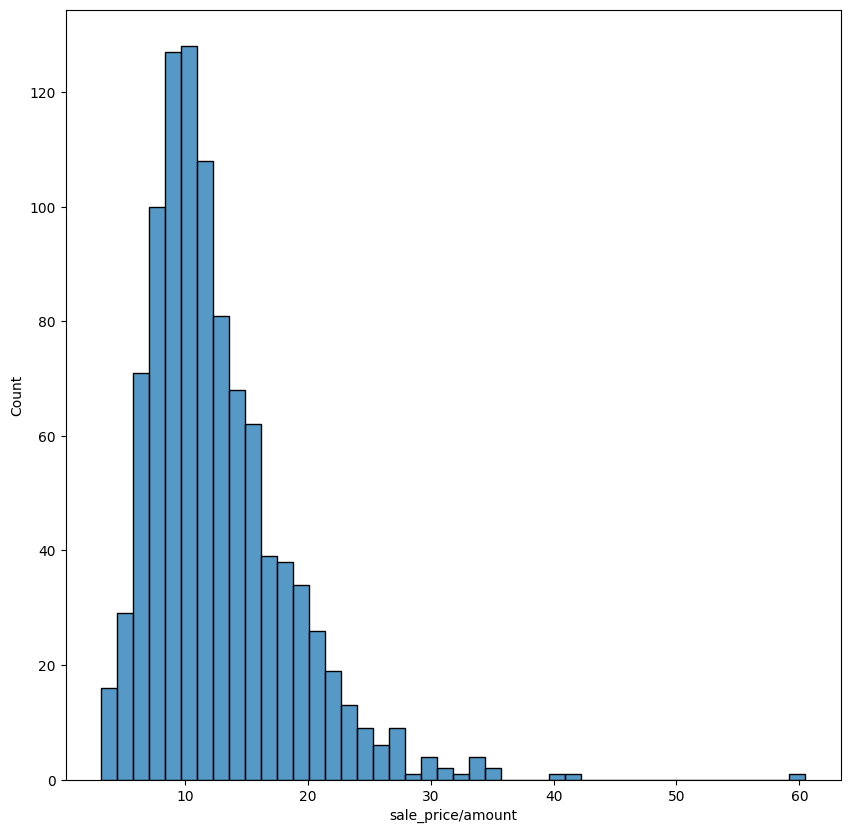

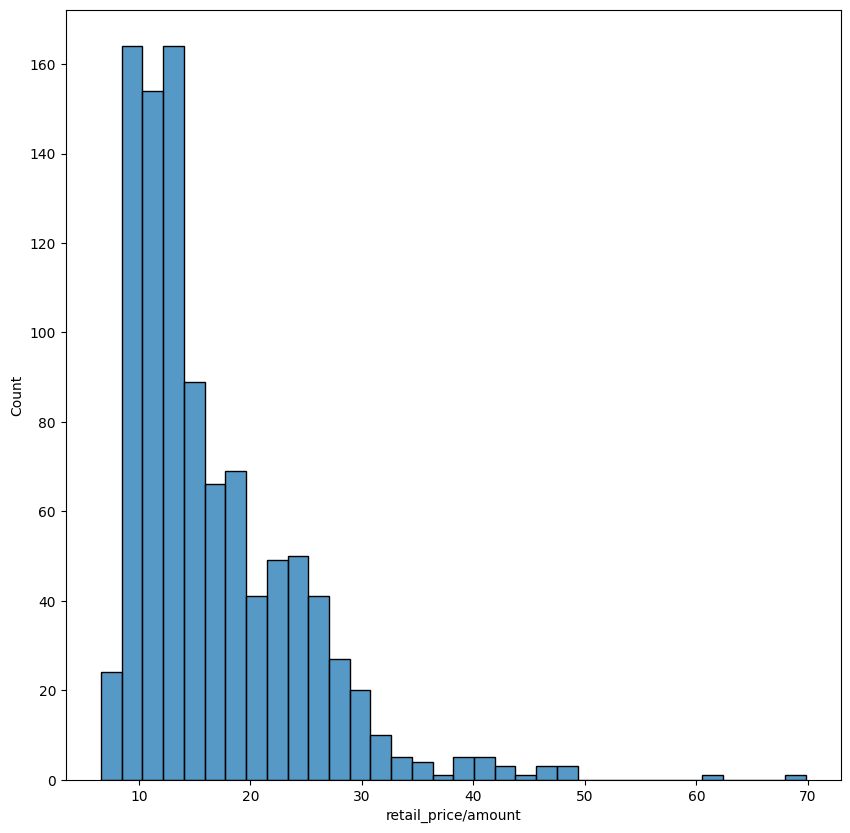

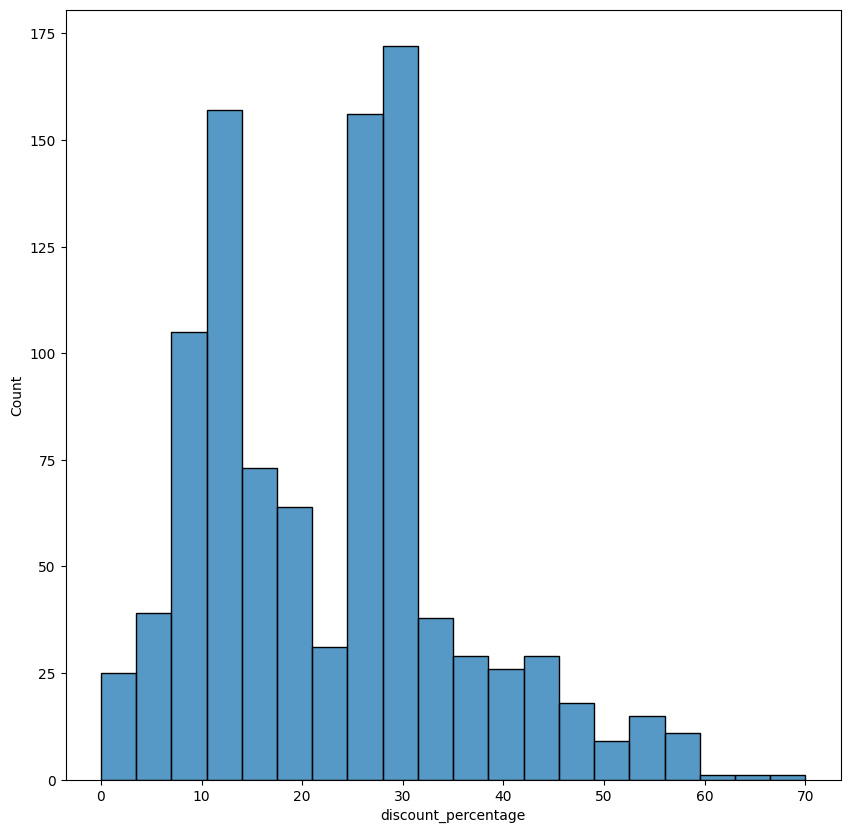

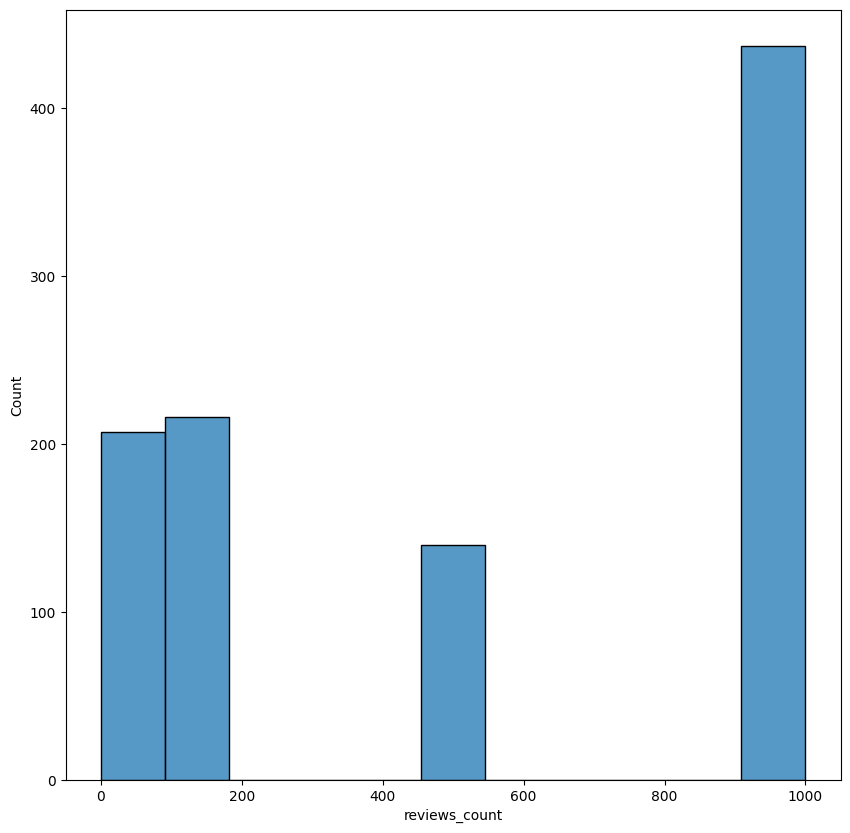

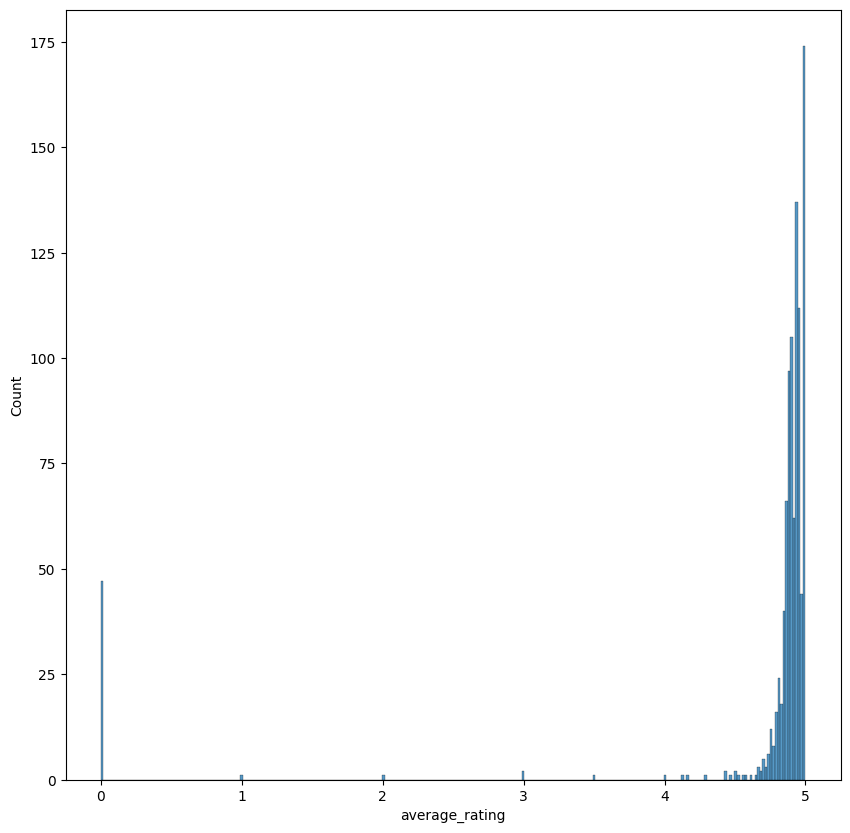

In [26]:

for cont_features in continuous_features:
    plt.figure(figsize=(10, 10))
    sns.histplot(data = df, x = cont_features)
    plt.show()

In [19]:
df

,product_id,sku,url,title,color,sale_price/amount,sale_price/amount_with_symbol,retail_price/amount,retail_price/amount_with_symbol,discount_percentage,category_name,category_id,description,reviews_count,average_rating
0,22039173,sm2307273039173611,https://us.shein.com/Manfinity-Homme-Men-Plus-...,Manfinity Homme Men Plus Solid Tee & Shorts,White,18.74,$18.74,26.39,$26.39,29,Men Plus Size T-Shirt Co-ords,6317,Color: White\nStyle: Casual\nPattern Type: Pla...,64,4.98
1,24808563,rm2308169291469282,https://us.shein.com/ROMWE-Street-Life-Men-Let...,ROMWE Street Life Men's Short Sleeve T-Shirt W...,Black,9.24,$9.24,12.49,$12.49,26,Men T-Shirts,1980,Color: Black\nStyle: Casual\nPattern Type: Car...,100,4.95
2,23321220,sm2309079942461816,https://us.shein.com/Manfinity-Men-Contrast-Pa...,Manfinity Men Contrast Panel Drawstring Sweatp...,Navy Blue,6.15,$6.15,14.29,$14.29,57,Men Sweatpants,2988,Color: Navy Blue\nPattern Type: Colorblock\nDe...,1000,4.87
3,27635772,sm2311021427722837,https://us.shein.com/Manfinity-Homme-Men-s-Plu...,Manfinity Homme Men's Plus Size Striped Trim S...,Apricot,13.19,$13.19,14.99,$14.99,12,Men Plus Size Polo Shirts,6307,Color: Apricot\nStyle: Casual\nPattern Type: P...,24,4.92
4,30885163,sm2403027733789007,https://us.shein.com/Mens-Fitness-Taco-Funny-T...,Mens Fitness Taco Funny T Shirt Humorous Gym G...,Heather Red,11.99,$11.99,11.99,$11.99,0,Men T-Shirts,1980,Color: Heather Red\nStyle: Casual\nLength: Reg...,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,27356789,sm2311175426657720,https://us.shein.com/Manfinity-AFTRDRK-Men-s-P...,Manfinity AFTRDRK Men's Patchwork Lapel Single...,Blue,28.35,$28.35,41.09,$41.09,31,Men Suits,2484,Color: Blue\nStyle: Work\nStyle: Party\nPatter...,100,4.86
996,11631429,sm2209135287061185,https://us.shein.com/Manfinity-Hypemode-Loose-...,Manfinity Hypemode Loose Fit Men's Straight Le...,Light Wash,18.42,$18.42,27.49,$27.49,33,Men Jeans,1989,Color: Light Wash\nPattern Type: Floral\nDetai...,500,4.86
997,21765230,sm2112156721129940,https://us.shein.com/Manfinity-RSRT-Men-Tropic...,Manfinity RSRT Men Tropical Print Shirt & Draw...,Mint Green,17.49,$17.49,20.49,$20.49,15,Men Shirt Co-ords,9037,Color: Mint Green\nStyle: Boho\nPattern Type: ...,1000,4.92
998,20870851,sm2306162921275518,https://us.shein.com/Men-Solid-Button-Up-Shirt...,Men Solid Button Up Shirt,Beige,10.34,$10.34,11.49,$11.49,10,Men Shirts,1979,Color: Beige\nStyle: Casual\nPattern Type: Pla...,100,4.89


In [27]:
df.nunique()

product_id                         1000
sku                                1000
url                                1000
title                               881
color                                60
sale_price/amount                   537
sale_price/amount_with_symbol       537
retail_price/amount                 254
retail_price/amount_with_symbol     254
discount_percentage                  59
category_name                        50
category_id                          50
description                         971
reviews_count                        75
average_rating                       52
dtype: int64

<Axes: xlabel='sale_price/amount', ylabel='retail_price/amount'>

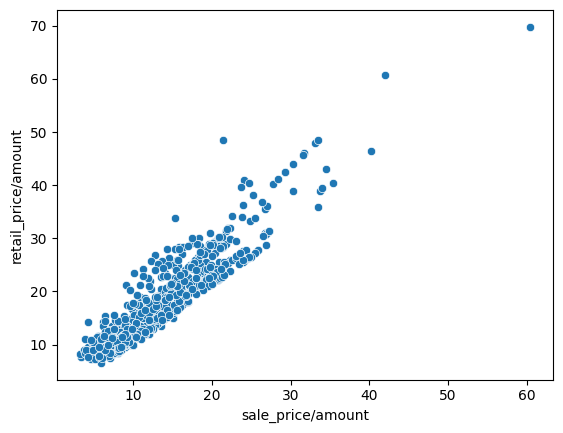

In [28]:
sns.scatterplot(data = df, x= 'sale_price/amount', y = 'retail_price/amount')

In [42]:
df['has_black'] = df['description'].str.contains('black', case=False)

In [43]:
df['has_black'].value_counts()

has_black
False    776
True     224
Name: count, dtype: int64

In [44]:
df['has_white'] = df['description'].str.contains('white', case = False)
df['has_white'].value_counts()

has_white
False    867
True     133
Name: count, dtype: int64

In [74]:
df['casual_style'] = df['description'].str.contains('casual', case = False)
df['casual_style'].value_counts()

casual_style
True     659
False    341
Name: count, dtype: int64

In [50]:
df[(df['description'].str.contains('casual|boho|street|work', case = False) == False)]

,product_id,sku,url,title,color,sale_price/amount,sale_price/amount_with_symbol,retail_price/amount,retail_price/amount_with_symbol,discount_percentage,category_name,category_id,description,reviews_count,average_rating,has_black,has_white,casual_style
2,23321220,sm2309079942461816,https://us.shein.com/Manfinity-Men-Contrast-Pa...,Manfinity Men Contrast Panel Drawstring Sweatp...,Navy Blue,6.15,$6.15,14.29,$14.29,57,Men Sweatpants,2988,Color: Navy Blue\nPattern Type: Colorblock\nDe...,1000,4.87,False,False,False
20,23123372,sm2308219882276414,https://us.shein.com/Men-Solid-Raw-Hem-Skinny-...,Men Solid Raw Hem Skinny Jeans,Red,25.89,$25.89,27.79,$27.79,7,Men Jeans,1989,Color: Red\nPattern Type: Plain\nDetails: Pock...,1000,5.00,False,False,False
26,30883598,sm2403021112225121,https://us.shein.com/Gildan-Mens-Short-Sleeve-...,Gildan Mens Short Sleeve Soft-Style T-Shirt (A...,Royal Blue,14.97,$14.97,21.00,$21.00,29,Men T-Shirts,1980,Color: Royal Blue\nLength: Regular\nMaterial: ...,0,0.00,False,False,False
45,13537591,sm2212075868805235,https://us.shein.com/Men-Solid-Drawstring-Wais...,Men Solid Drawstring Waist Sweatpants,Black,9.29,$9.29,12.39,$12.39,25,Men Sweatpants,2988,Color: Black\nPattern Type: Plain\nType: Jogge...,1000,5.00,True,False,False
49,24375383,sm2308225145511349,https://us.shein.com/Manfinity-Hypemode-Loose-...,Manfinity Hypemode Loose Fit Men's Slant Pocke...,Medium Wash,18.23,$18.23,26.09,$26.09,30,Men Jeans,1989,Color: Medium Wash\nPattern Type: Plain\nDetai...,100,4.83,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,25368237,sm2309133304999756,https://us.shein.com/Manfinity-Hypemode-Loose-...,Manfinity Hypemode Loose Fit Men's Wide Leg Je...,Dark Grey,18.95,$18.95,27.09,$27.09,30,Men Jeans,1989,Color: Dark Grey\nPattern Type: Plain\nDetails...,100,4.89,False,False,False
979,27087396,sm2308289293183470,https://us.shein.com/Men-S-Plain-Fashionable-C...,Men'S Plain Fashionable Creative Jeans,White,26.89,$26.89,28.79,$28.79,7,Men Jeans,1989,Color: White\nPattern Type: Plain\nDetails: Po...,1000,4.80,False,True,False
986,25763688,sm2310187877944629,https://us.shein.com/Manfinity-LEGND-Men-Rippe...,Manfinity LEGND Men Ripped Skinny Jeans,Light Wash,12.72,$12.72,23.99,$23.99,47,Men Jeans,1989,Color: Light Wash\nPattern Type: Plain\nDetail...,1000,4.89,False,False,False
989,15545392,st2304204434813575,https://us.shein.com/Manfinity-Men-Allover-Pri...,Manfinity Men Allover Print Drawstring Waist S...,Black,8.99,$8.99,11.99,$11.99,25,Men Beach Shorts,2025,Color: Black\nPattern Type: All Over Print\nDe...,100,4.94,True,False,False


In [56]:
df[~(df['description'].str.contains('style', case = False) == True)]

,product_id,sku,url,title,color,sale_price/amount,sale_price/amount_with_symbol,retail_price/amount,retail_price/amount_with_symbol,discount_percentage,category_name,category_id,description,reviews_count,average_rating,has_black,has_white,casual_style,no_style
2,23321220,sm2309079942461816,https://us.shein.com/Manfinity-Men-Contrast-Pa...,Manfinity Men Contrast Panel Drawstring Sweatp...,Navy Blue,6.15,$6.15,14.29,$14.29,57,Men Sweatpants,2988,Color: Navy Blue\nPattern Type: Colorblock\nDe...,1000,4.87,False,False,False,False
20,23123372,sm2308219882276414,https://us.shein.com/Men-Solid-Raw-Hem-Skinny-...,Men Solid Raw Hem Skinny Jeans,Red,25.89,$25.89,27.79,$27.79,7,Men Jeans,1989,Color: Red\nPattern Type: Plain\nDetails: Pock...,1000,5.00,False,False,False,False
26,30883598,sm2403021112225121,https://us.shein.com/Gildan-Mens-Short-Sleeve-...,Gildan Mens Short Sleeve Soft-Style T-Shirt (A...,Royal Blue,14.97,$14.97,21.00,$21.00,29,Men T-Shirts,1980,Color: Royal Blue\nLength: Regular\nMaterial: ...,0,0.00,False,False,False,False
45,13537591,sm2212075868805235,https://us.shein.com/Men-Solid-Drawstring-Wais...,Men Solid Drawstring Waist Sweatpants,Black,9.29,$9.29,12.39,$12.39,25,Men Sweatpants,2988,Color: Black\nPattern Type: Plain\nType: Jogge...,1000,5.00,True,False,False,False
49,24375383,sm2308225145511349,https://us.shein.com/Manfinity-Hypemode-Loose-...,Manfinity Hypemode Loose Fit Men's Slant Pocke...,Medium Wash,18.23,$18.23,26.09,$26.09,30,Men Jeans,1989,Color: Medium Wash\nPattern Type: Plain\nDetai...,100,4.83,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,25368237,sm2309133304999756,https://us.shein.com/Manfinity-Hypemode-Loose-...,Manfinity Hypemode Loose Fit Men's Wide Leg Je...,Dark Grey,18.95,$18.95,27.09,$27.09,30,Men Jeans,1989,Color: Dark Grey\nPattern Type: Plain\nDetails...,100,4.89,False,False,False,False
979,27087396,sm2308289293183470,https://us.shein.com/Men-S-Plain-Fashionable-C...,Men'S Plain Fashionable Creative Jeans,White,26.89,$26.89,28.79,$28.79,7,Men Jeans,1989,Color: White\nPattern Type: Plain\nDetails: Po...,1000,4.80,False,True,False,False
986,25763688,sm2310187877944629,https://us.shein.com/Manfinity-LEGND-Men-Rippe...,Manfinity LEGND Men Ripped Skinny Jeans,Light Wash,12.72,$12.72,23.99,$23.99,47,Men Jeans,1989,Color: Light Wash\nPattern Type: Plain\nDetail...,1000,4.89,False,False,False,False
989,15545392,st2304204434813575,https://us.shein.com/Manfinity-Men-Allover-Pri...,Manfinity Men Allover Print Drawstring Waist S...,Black,8.99,$8.99,11.99,$11.99,25,Men Beach Shorts,2025,Color: Black\nPattern Type: All Over Print\nDe...,100,4.94,True,False,False,False


In [58]:
df['no_style'] = ~df['description'].str.contains('style', case = False)
df['no_style']

0      False
1      False
2       True
3      False
4      False
       ...  
995    False
996     True
997    False
998    False
999    False
Name: no_style, Length: 1000, dtype: bool

In [59]:
df['no_style'].value_counts()


no_style
False    850
True     150
Name: count, dtype: int64

In [63]:
df['street_style'] = df['description'].str.contains('street', case = False)
df['boho_style'] = df['description'].str.contains('boho', case = False)
df['work_style'] = df['description'].str.contains('work', case = False)

style_features = ['no_style', 'casual_style', 'work_style', 'boho_style', 'work_style']

no_style
False    0.85
True     0.15
Name: proportion, dtype: float64


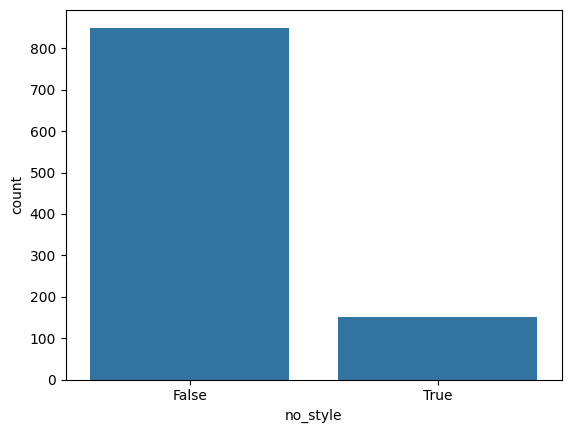

casual_style
True     0.659
False    0.341
Name: proportion, dtype: float64


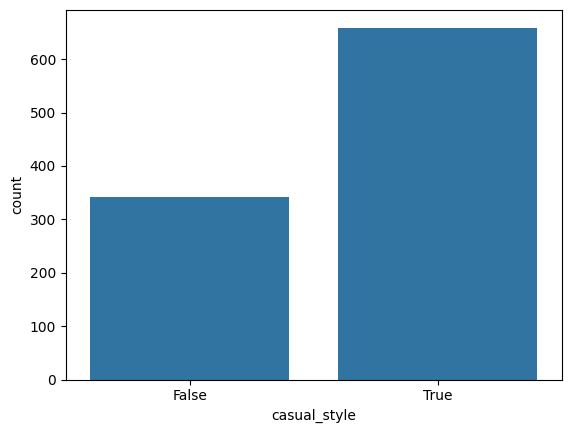

work_style
False    0.974
True     0.026
Name: proportion, dtype: float64


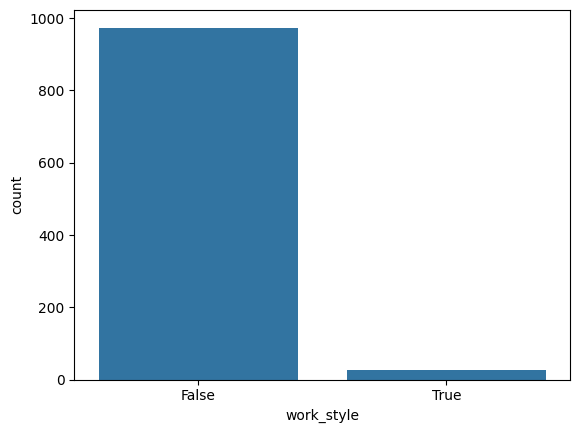

boho_style
False    0.897
True     0.103
Name: proportion, dtype: float64


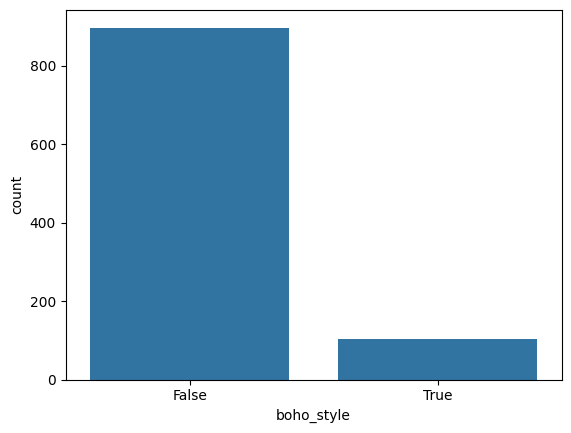

work_style
False    0.974
True     0.026
Name: proportion, dtype: float64


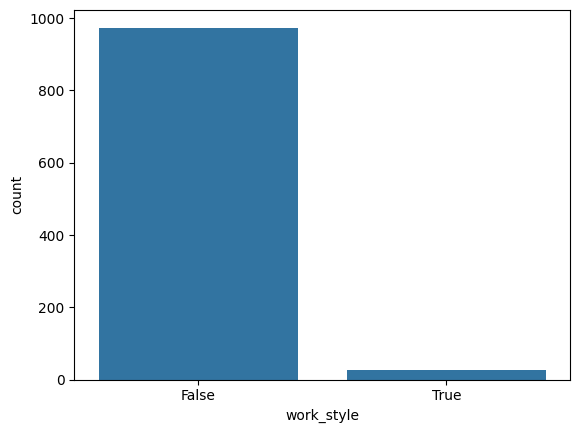

In [66]:
for style in style_features:
    print(df[style].value_counts(normalize=True))
    sns.countplot(data = df, x = style)
    plt.show()

In [71]:
df.head()

,product_id,sku,url,title,color,sale_price/amount,sale_price/amount_with_symbol,retail_price/amount,retail_price/amount_with_symbol,discount_percentage,...,description,reviews_count,average_rating,has_black,has_white,casual_style,no_style,street_style,boho_style,work_style
0,22039173,sm2307273039173611,https://us.shein.com/Manfinity-Homme-Men-Plus-...,Manfinity Homme Men Plus Solid Tee & Shorts,White,18.74,$18.74,26.39,$26.39,29,...,Color: White\nStyle: Casual\nPattern Type: Pla...,64,4.98,False,True,True,False,False,False,False
1,24808563,rm2308169291469282,https://us.shein.com/ROMWE-Street-Life-Men-Let...,ROMWE Street Life Men's Short Sleeve T-Shirt W...,Black,9.24,$9.24,12.49,$12.49,26,...,Color: Black\nStyle: Casual\nPattern Type: Car...,100,4.95,True,False,True,False,False,False,False
2,23321220,sm2309079942461816,https://us.shein.com/Manfinity-Men-Contrast-Pa...,Manfinity Men Contrast Panel Drawstring Sweatp...,Navy Blue,6.15,$6.15,14.29,$14.29,57,...,Color: Navy Blue\nPattern Type: Colorblock\nDe...,1000,4.87,False,False,False,True,False,False,False
3,27635772,sm2311021427722837,https://us.shein.com/Manfinity-Homme-Men-s-Plu...,Manfinity Homme Men's Plus Size Striped Trim S...,Apricot,13.19,$13.19,14.99,$14.99,12,...,Color: Apricot\nStyle: Casual\nPattern Type: P...,24,4.92,False,False,True,False,False,False,False
4,30885163,sm2403027733789007,https://us.shein.com/Mens-Fitness-Taco-Funny-T...,Mens Fitness Taco Funny T Shirt Humorous Gym G...,Heather Red,11.99,$11.99,11.99,$11.99,0,...,Color: Heather Red\nStyle: Casual\nLength: Reg...,0,0.00,False,False,True,False,False,False,False


In [75]:
style_mapping = {True : 1, False :0}
for style in style_features:
    df[style] = df[style].map(style_mapping)

<Axes: >

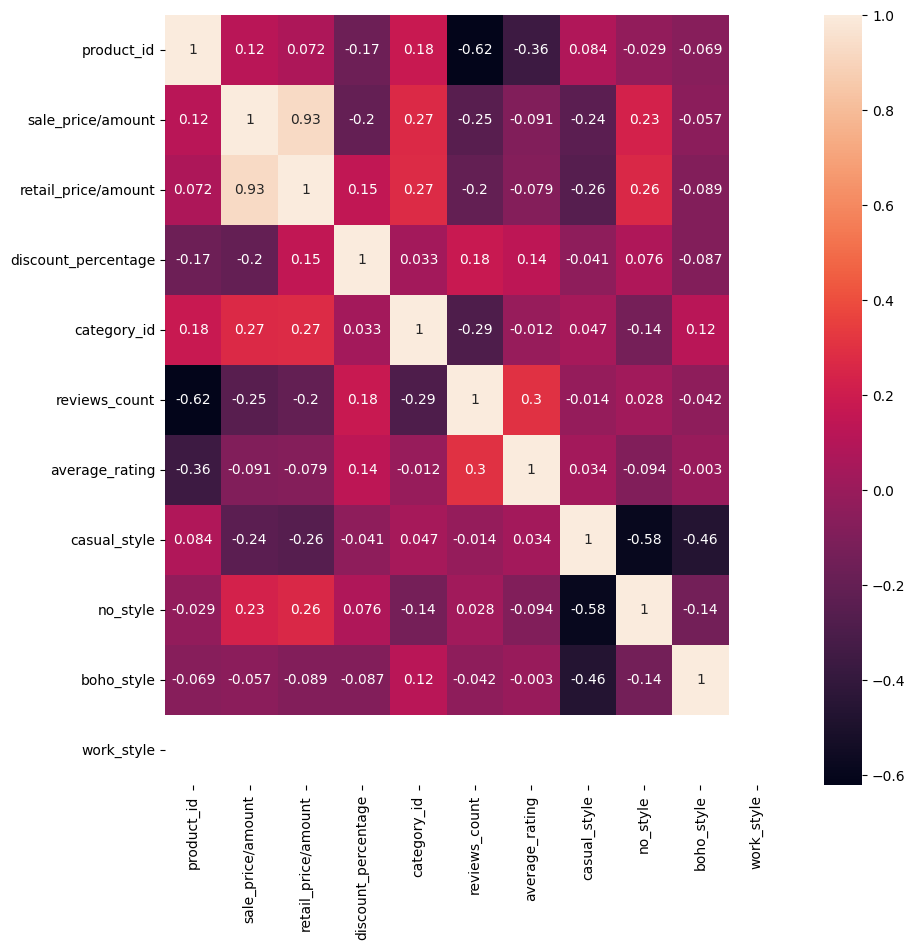

In [77]:
plt.figure(figsize = (10,10))
sns.heatmap(df.select_dtypes(include = ['int64', 'float64']).corr(), annot=True)